# **DepressionDetection_NLP**

## **Problem Definition**
Depression is a prevalent mental health disorder that affects millions of people worldwide. Traditional methods of detecting depression, such as clinical interviews and self-report questionnaires, can be time-consuming and may not capture the full spectrum of depressive symptoms1. Leveraging NLP techniques to analyze textual data from social media, forums, or other digital platforms offers a promising alternative for early detection and intervention.

### **The Context:**
With the rise of social media and online communication, individuals increasingly express their thoughts, feelings, and experiences digitally. This abundance of textual data presents an opportunity to identify linguistic patterns, sentiment cues, and semantic structures indicative of depressive symptoms2. By analyzing this data, researchers can potentially detect depression earlier and provide timely support to those in need.

### **The objective:**
The primary objective of this project is to develop an NLP-based system capable of accurately detecting signs of depression in textual data. This system should be able to:
* Extract relevant features from text data (e.g., sentiment, linguistic markers).
* Classify text data into categories indicating the presence or absence of depressive symptoms.
* Provide insights that can aid mental health professionals in early intervention and treatment planning.

### **The problem formulation**:
To formulate the problem, we can break it down into several key tasks:
Data Collection
Data Preprocessing
Feature Extraction
Model Training
Evaluation

## **Data Dictionary**
Index: Id of a tweet
Message to examine:The message on which the Sentimental Analysis needs to be performed
label(depression result):Does the person have depression? 0 stands for NO and 1 stands for YES

## **Data Source**
https://www.kaggle.com/datasets/gargmanas/sentimental-analysis-for-tweets

https://www.kaggle.com/datasets/kazanova/sentiment140

### **Importing Libraries and the Dataset**

In [5]:
import os
from pathlib import Path
parent_path = Path(os.path.abspath(os.getcwd())).parent
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt
# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns




### **Load the dataset**

In [6]:
#Naming the columns while reading the data
columns = ['target','id','date','flag','user','text']
twitter_data=pd.read_csv(os.path.join(parent_path,'data/data_with_user_info.csv'),encoding='latin-1',names=columns)

### **Understanding the data by viewing a few observations**

In [7]:
twitter_data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
twitter_data.shape

(1600000, 6)

In [9]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [10]:
twitter_data.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [11]:
twitter_data['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

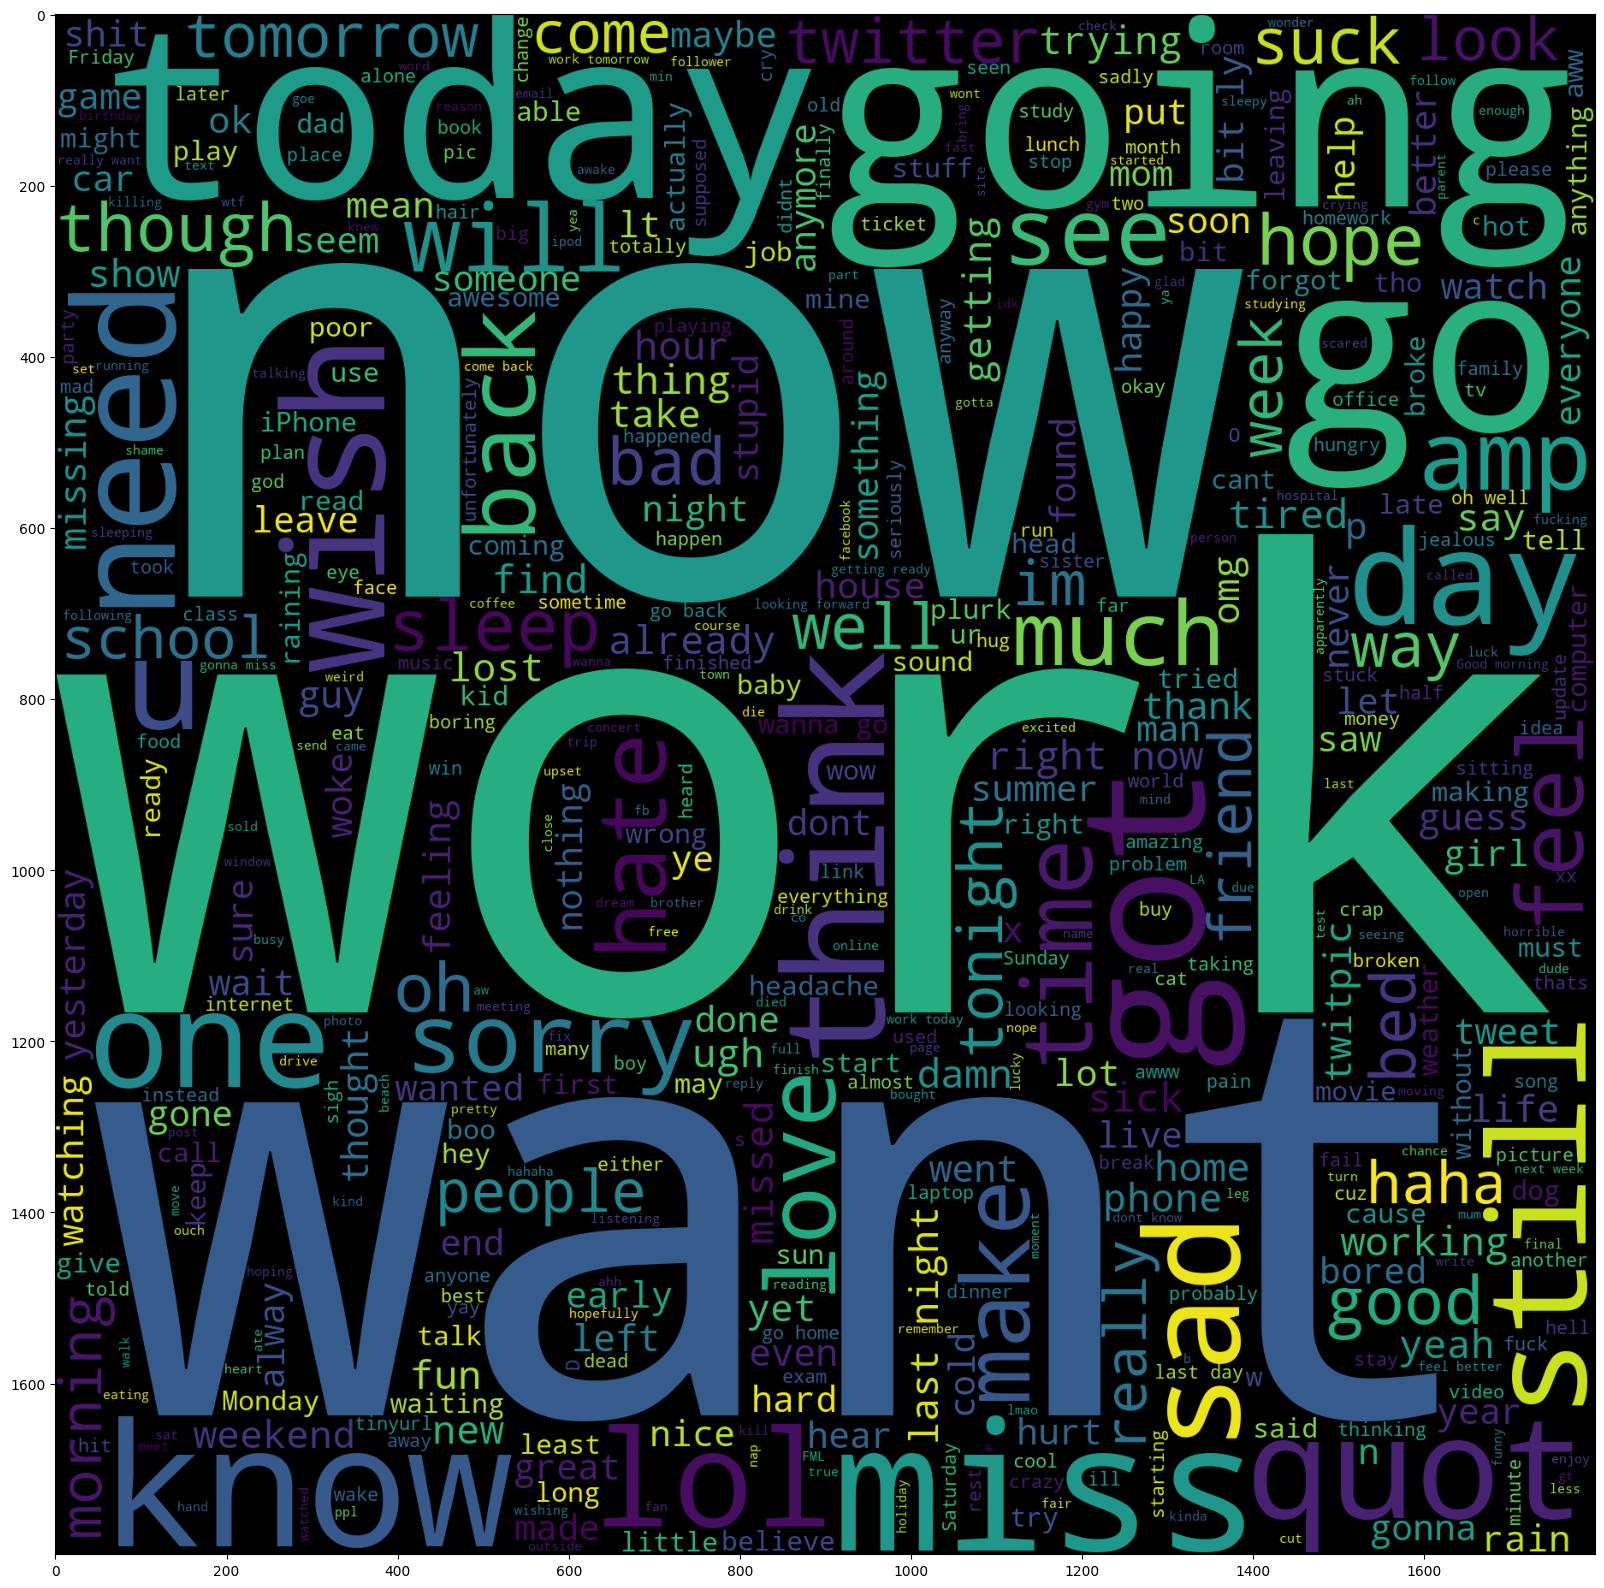

In [12]:
#Depression sentiments
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
word_cloud_data = twitter_data[twitter_data['target'] == 0]['text']
plt.figure(figsize=(20,20))
wc_img_data = WordCloud(max_words = 500, width = 1800 , height = 1800).generate(" ".join(word_cloud_data))
plt.imshow(wc_img_data)


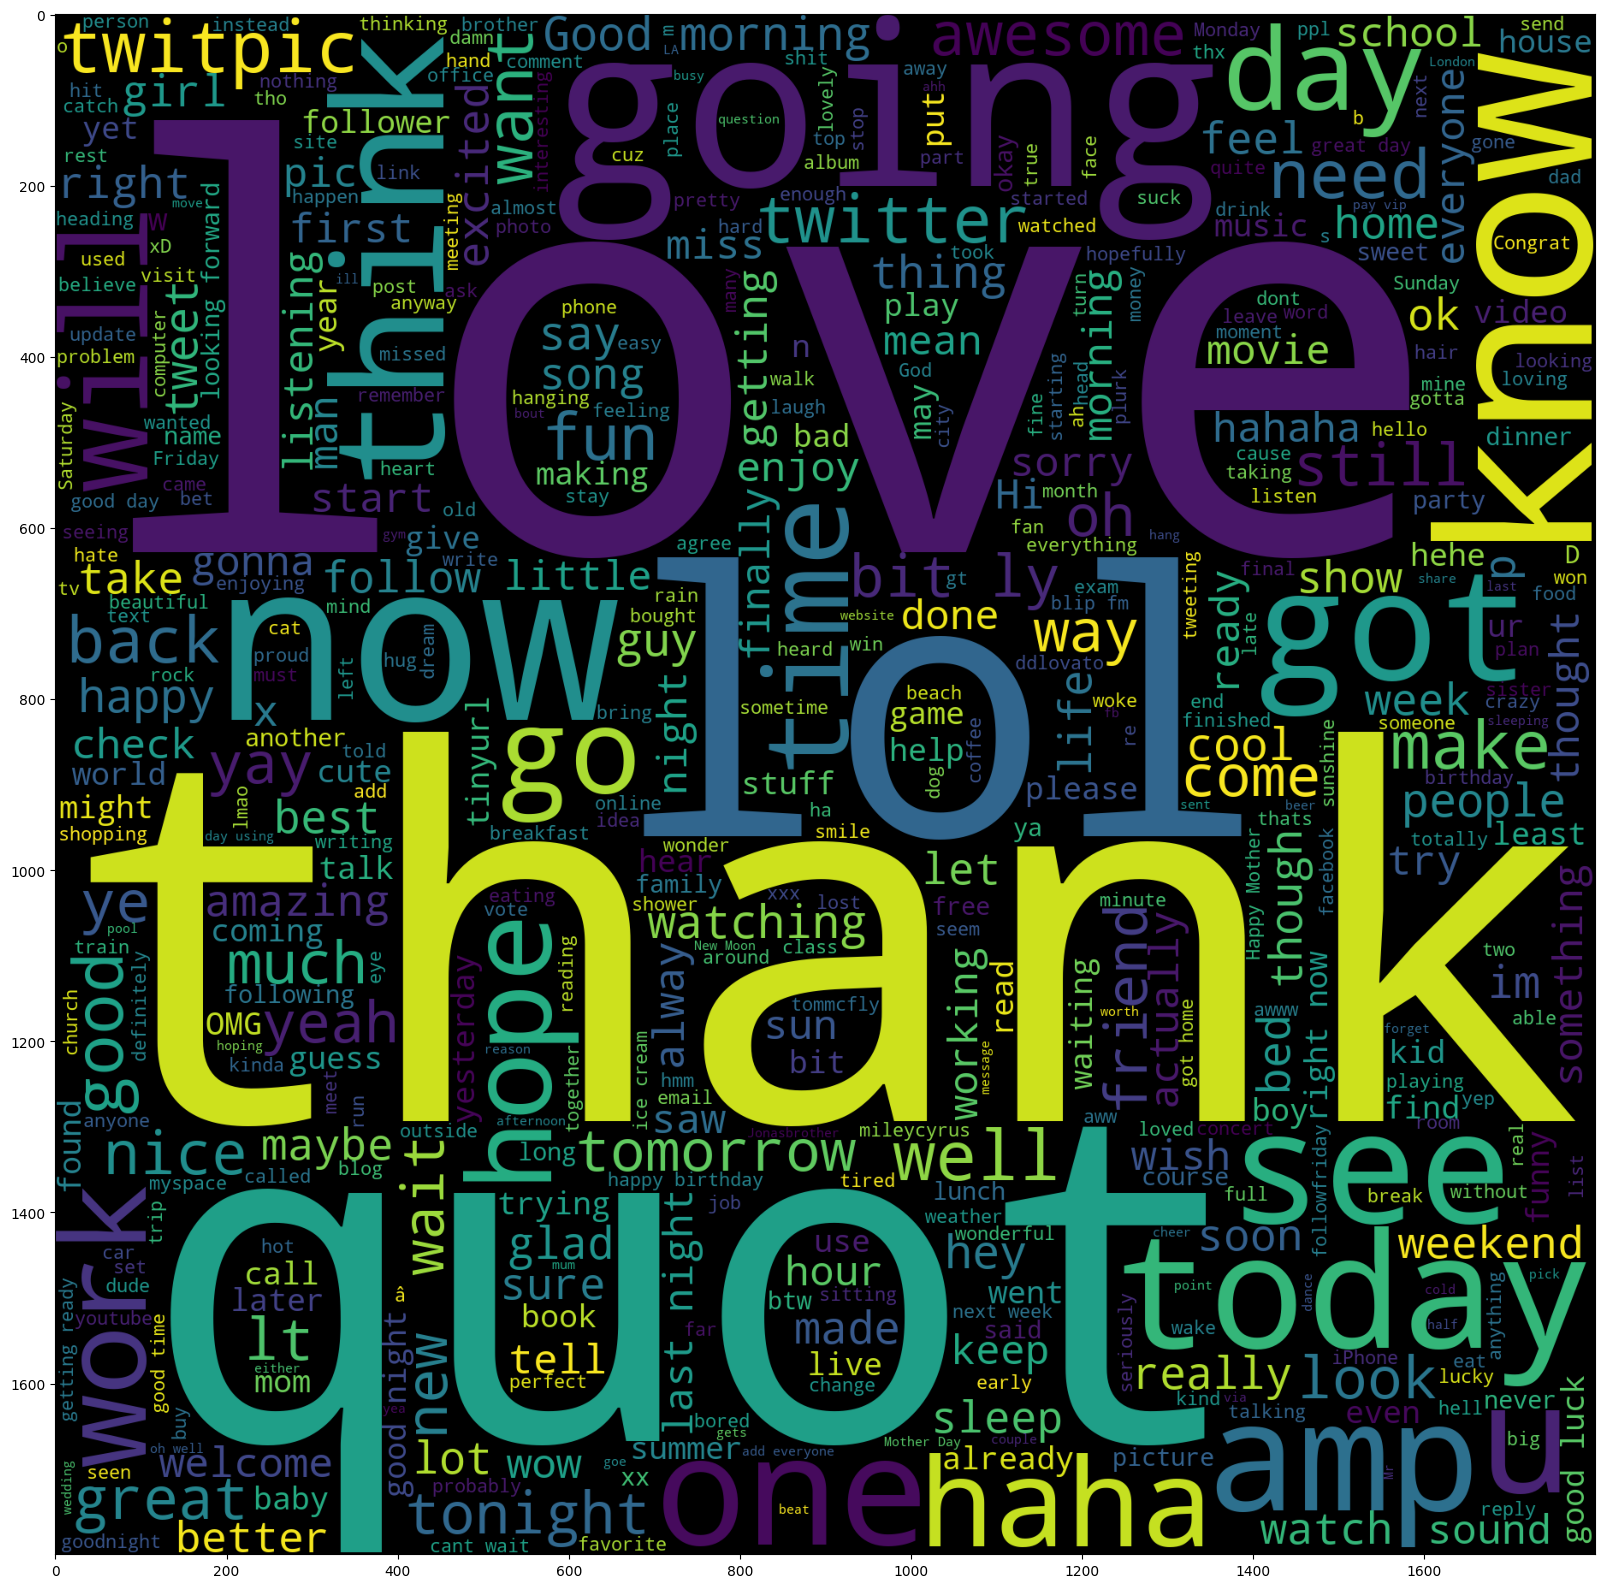

In [13]:
#Non-Depressive sentiments
word_cloud_data = twitter_data[twitter_data['target'] == 4]['text']
plt.figure(figsize=(20,20))
wc_img_data = WordCloud(max_words = 500, width = 1800 , height = 1800).generate(" ".join(word_cloud_data))
plt.imshow(wc_img_data)

### **Data Processing**

#### Converting target values to 0 and 1
#### * 0-->Negative Tweet ->Depressive
#### * 1-->Positive Tweet

In [17]:
twitter_data.replace({'target':{4:1}},inplace=True)
twitter_data['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

#### Stemming/lemmatization
Its a technique used in NLP to reduce  words to their root form.  

In [20]:
import spacy
import re
#load spacy's english model
nlp = spacy.load('en_core_web_sm')

def lemmatization(text):
    #get the list of stopwords
    stop_words = nlp.Defaults.stop_words
    text = re.sub('[^a-zA-z]',' ',text).lower()
    doc = nlp(text)
    # Filter out stopwords and apply lemmatization
    filtered_tokens = [word.lemma_ for word in doc if word.text not in stop_words]
    filtered_tokens = ' '.join(filtered_tokens)
    return filtered_tokens

In [21]:
twitter_data['filtered_text'] = twitter_data['text'].apply(lemmatization)

In [23]:
#separating the data and label
X = twitter_data['filtered_text'].values
Y = twitter_data['target'].values

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)#stratify means giving a equal proportion of 0s and 1s

Training Data (fit_transform): The fit_transform method is used on the training data to learn the vocabulary and transform the data simultaneously. This is because the model needs to understand the structure and distribution of the training data.
Test Data (transform): The transform method is used on the test data to convert it into the same feature space as the training data, without altering the learned vocabulary. This ensures that the model evaluates the test data consistently with the training data.

In [25]:
#Convert test data to numerical data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
x_test =  vectorizer.transform(X_test)

In [26]:
X_train.shape, X_test.shape,Y_train.shape,Y_test.shape

((1280000, 508663), (320000,), (1280000,), (320000,))

In [35]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
def plot_confusion_matrix(Y_test,Y_prediction):
    cm = confusion_matrix(Y_test,Y_prediction)
    #plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

#### **Observations and Insights:**

## Building various models

* Logistic Regression
* K-Nearest Neighbors(KNN)
* Decision Tree
* Random Forest
* Support Vector Machines(SVM)
* Naive Bayes
* XGBoost
* Recurrent Neural network(RNN)
* Long Short-Term Memory(LSTM)
* Gated Recurrent Unit(GTU)
* Convolutional Neural Networks(CNN)
* BERT(Bidirectional Encoder  Representations From Transformers )
Hybrid Models: Combine different models to leverage their strengths. For example, use an ensemble of Logistic Regression and Random Forest for initial classification and fine-tune with a deep learning model like BERT.

Evaluation and Optimization:
Cross-Validation: Use k-fold cross-validation to ensure your model's robustness and prevent overfitting.
Hyperparameter Tuning: Optimize hyperparameters using techniques like Grid Search or Random Search to improve model performance.
Evaluation Metrics: Use a combination of metrics (accuracy, precision, recall, F1-score, ROC-AUC) to evaluate your model comprehensively.

### Logistic Regression
Linear regress is a linear relationship between the input features (variables) and the output (target).
Imagine drawing a straight line that best separates the two classes (like spam or not spam) based on the input features.

Logistic regression uses the sigmoid function to squeeze the linear relationship into a range between 0 and 1.
The sigmoid function looks like an "S" shaped curve and transforms the output of the linear equation to a probability.

if the probability is greater than threshold, we might classify the output as "yes"; otherwise, we classify it as "no."

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter=1000) #model goes thorugh the data of about 1000 times
model.fit(X_train,Y_train)


LogisticRegression(max_iter=1000)

#### Model Evaluation

In [29]:
from sklearn import metrics
from sklearn.metrics import classification_report
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)
training_data_accuracy

0.79916640625

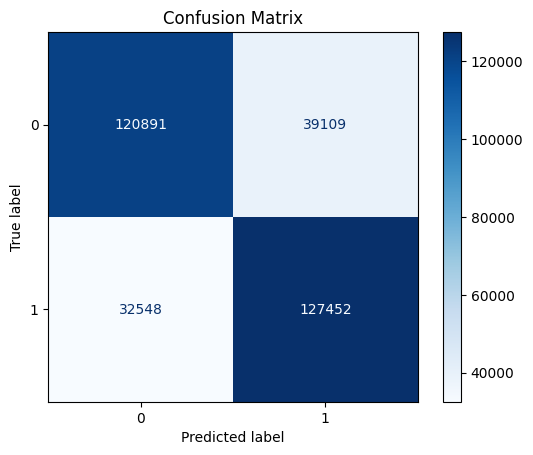

accuracy 0.776071875
Classification Report               precision    recall  f1-score   support

           0       0.79      0.76      0.77    160000
           1       0.77      0.80      0.78    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



In [36]:
from sklearn import metrics
from sklearn.metrics import classification_report
LogR_prediction = model.predict(x_test)
LogR_clf_report = classification_report(Y_test,LogR_prediction)
test_data_accuracy = accuracy_score(Y_test,LogR_prediction)
plot_confusion_matrix(Y_test,LogR_prediction)
print('accuracy',test_data_accuracy)
print('Classification Report',LogR_clf_report)

### Observations 
Logistic regression model has an accuracy of 78%, with balanced precision, recall, and F1-scores across both classes.

### K-Nearest Neighbors
When making a prediction for a new data point, KNN:

Calculates the distance (usually Euclidean) between the new data point and all the training data points.

Selects the 'K' nearest neighbors to the new data point.

For classification, it assigns the most common class label among the K-nearest neighbors.

For regression, it averages the values of the K-nearest neighbors to make a prediction.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=2) #This means that for predicting the class of a new data point, the classifier will consider the two closest data points (neighbors) in the training set.
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=2)

#### Model Evaluation

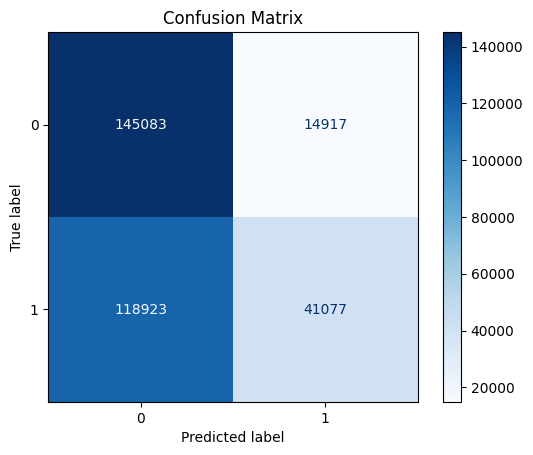

accuracy 0.58175
Classification Report               precision    recall  f1-score   support

           0       0.55      0.91      0.68    160000
           1       0.73      0.26      0.38    160000

    accuracy                           0.58    320000
   macro avg       0.64      0.58      0.53    320000
weighted avg       0.64      0.58      0.53    320000



In [37]:
knn_pred = knn_model.predict(x_test)
knn_clf_report = classification_report(Y_test,knn_pred)
test_data_accuracy = accuracy_score(Y_test,knn_pred)
plot_confusion_matrix(Y_test,knn_pred)
print('accuracy',test_data_accuracy)
print('Classification Report',knn_clf_report)

### Observations 
* Class 0 has a higher F1-score than Class 1
* Class 0 (precision: 0.55, recall: 0.91): High recall indicates the model is good at identifying actual positives for Class 0, but the precision is lower, suggesting some false positives.
* Class 1 (precision: 0.73, recall: 0.26): Higher precision indicates that when the model predicts Class 1, it’s more often correct, but low recall suggests it’s missing many actual positives.
The model seems to perform better at identifying Class 0, but struggles with Class 1
* Consider tuning the hyperparameters of the KNN model to improve the balance between precision and recall for both classes.



### Decision Tree
It makes decisions by splitting the data into subsets based on the value of the features
* Root Node: Start with the entire dataset.
* Splitting: Split the dataset based on the  feature 
* Decision Nodes: Further split the subsets based on other features.
* Leaf Nodes: The final nodes will predict the results


In [38]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree_model = dtree.fit(X_train,Y_train)


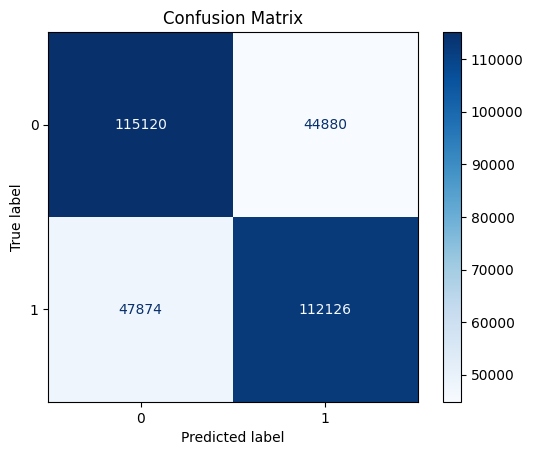

accuracy 0.71014375
Classification Report               precision    recall  f1-score   support

           0       0.71      0.72      0.71    160000
           1       0.71      0.70      0.71    160000

    accuracy                           0.71    320000
   macro avg       0.71      0.71      0.71    320000
weighted avg       0.71      0.71      0.71    320000



In [39]:
dtree_pred = dtree_model.predict(x_test)
dtree_clf_report = classification_report(Y_test,dtree_pred)
test_data_accuracy = accuracy_score(Y_test,dtree_pred)
plot_confusion_matrix(Y_test,dtree_pred)
print('accuracy',test_data_accuracy)
print('Classification Report',dtree_clf_report)

### Observations
The model exhibits balanced precision, recall, and F1-scores across both classes, indicating that it performs consistently well for each class.
While the model performs decently,tweaking hyper parametersor or trying ensemble methods like Random Forest to boost performance. 

### Random Forest
* A random forest consists of a collection (forest) of decision trees.
* Each tree is trained on a different subset of the training data, created by bootstrapping (random sampling with replacement).
* Additionally, when splitting nodes, only a random subset of features is considered, which adds an extra layer of randomness.

* For classification tasks, the final prediction is made by taking the majority vote of all the individual trees' predictions.

* For regression tasks, the final prediction is made by averaging the predictions of all the individual trees.

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf_model = rf.fit(X_train,Y_train)


#### Model Evaluation


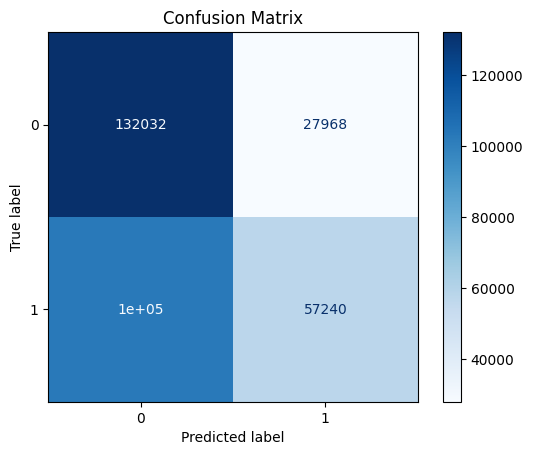

accuracy 0.591475
Classification Report               precision    recall  f1-score   support

           0       0.56      0.83      0.67    160000
           1       0.67      0.36      0.47    160000

    accuracy                           0.59    320000
   macro avg       0.62      0.59      0.57    320000
weighted avg       0.62      0.59      0.57    320000



In [41]:
rf_pred = rf_model.predict(x_test)
rf_clf_report = classification_report(Y_test,rf_pred)
test_data_accuracy = accuracy_score(Y_test,rf_pred)
plot_confusion_matrix(Y_test,rf_pred)
print('accuracy',test_data_accuracy)
print('Classification Report',rf_clf_report)

### Observations
The model correctly classifies 59.1% of the instances, indicating moderate performance.
* Class 0 (precision: 0.56, recall: 0.83): High recall suggests the model is good at identifying positives for Class 0 but has moderate
* Class 1 (precision: 0.67, recall: 0.36): Higher precision indicates that when the model predicts Class 1, it’s often correct, but low recall suggests it’s missing many actual positives.
* The model seems to perform better at identifying Class 0, but it struggles with Class 1.
* Further tuning the hyperparameters or using a different model to improve the balance between precision and recall for both classes.

### Support Vector Machine (SVM)
SVM aims to find the best boundary that separates different classes (e.g., positive and negative or 0/1) in your data.
* It tries to draw a line (or a plane in higher dimensions) that divides the data into classes.
* The data points that are closest to this boundary are called support vectors.
* By maximizing the margin, SVM makes the model more confident and accurate in predicting which class new data points belong to.

In [42]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc_model = svc.fit(X_train,Y_train)


#### Model Evaluation

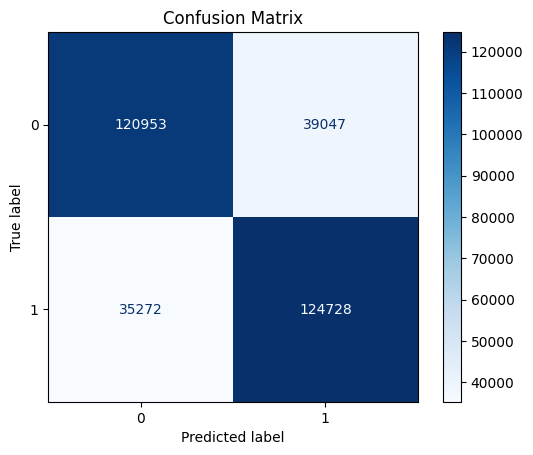

accuracy 0.767753125
Classification Report               precision    recall  f1-score   support

           0       0.77      0.76      0.76    160000
           1       0.76      0.78      0.77    160000

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000

Support vector machine Accuracy : 
 76.7753125 %


In [47]:
svc_pred = svc_model.predict(x_test)
svc_clf_report = classification_report(Y_test,svc_pred)
test_data_accuracy = accuracy_score(Y_test,svc_pred)
plot_confusion_matrix(Y_test,svc_pred)
print('accuracy',test_data_accuracy)
print('Classification Report',svc_clf_report)

sss, vvv, thresholds = metrics.roc_curve(Y_test, svc_pred, pos_label=1)
svc = format(metrics.auc(sss, vvv))
svc = float(svc)*100
print("Support vector machine Accuracy : \n", svc, "%")


#### Observation
The overall accuracy of the Support Vector Classifier (SVC) model is 76.78%.
The precision, recall, and F1-scores for both classes are very close, indicating that the model performs consistently across both classes.
SVC model shows a balanced performance with both classes being equally represented and evaluated.

### Naive Bayes
* The algorithm learns the probabilities of certain words appearing in messages and its seniments from the training data.
* When a new message comes calculate the probability of the message being or or 1 based on the words it contains.
* The algorithm then assigns the message to the class with highest probability

In [48]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train,Y_train)

MultinomialNB()

#### Model Evaluation

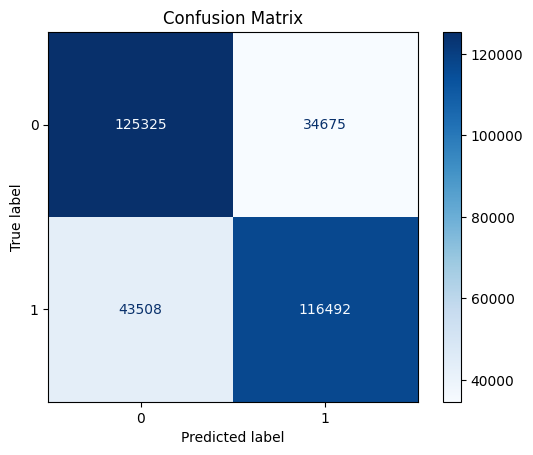

accuracy 0.755678125
Classification Report               precision    recall  f1-score   support

           0       0.74      0.78      0.76    160000
           1       0.77      0.73      0.75    160000

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



In [50]:
nb_pred = nb_model.predict(x_test)
nb_report = classification_report(Y_test,nb_pred)
test_data_accuracy = accuracy_score(Y_test,nb_pred)
plot_confusion_matrix(Y_test,nb_pred)
print('accuracy',test_data_accuracy)
print('Classification Report',nb_report)

#### Observations 
Accuracy of the Naive Bayes model is 75.57%.
There is an equal number of samples for both classes (0 and 1), so the model doesn't face class imbalance issues.
The Naive Bayes model shows a balanced performance with both classes being equally represented and evaluated


#### **Save the trained model**

In [ ]:
import pickle
filename = 'depreesion_analysis_lr.sav'
pickle.dump(model,open(filename,'wb'))

#### **Load the saved model**

In [ ]:
loaded_model = pickle.load(open(filename,'rb'))
tweet_input = 'i am going for a trip '
print('twitter_message',':',input)
num_input = vectorizer.transform([tweet_input])
prediction = loaded_model.predict(num_input)
if prediction==1:
    print('Depression analysis:',prediction, 'Not in Depression')
   
else:
    print('Depression analysis:',prediction, 'In Depression')


## **Conclusion and Recommendations**

Among the evaluated models, Logistic Regression showed the highest accuracy and consistent performance, making it a strong candidate for depression analysis. However, exploring ensemble methods and addressing class imbalance issues could further enhance the overall performance and reliability of the models.

* Logistic Regression: Accuracy: 77.61%
* K-Nearest Neighbors (KNN):Accuracy:58.18%
* Decision Tree: Accuracy: 71.01%
* Random Forest:Accuracy:59.15%
* Support Vector Classifier (SVC): Accuracy:76.78%
* Naive Bayes:Accuracy:75.57

